# 第5回講義 宿題

## 課題. Tensorflowを用いて, MNISTを多層パーセプトロン(MLP)で学習せよ

### 注意

- homework関数を完成させて提出してください
    - 訓練データはtrain_X, train_y, テストデータはtest_Xで与えられます
    - train_Xとtrain_yをtrain_X, train_yとvalid_X, valid_yに分けるなどしてモデルを学習させてください
    - test_Xに対して予想ラベルpred_yを作り, homework関数の戻り値としてください
- pred_yのtest_yに対する精度(F値)で評価します
- 全体の実行時間がiLect上で60分を超えないようにしてください
- homework関数の外には何も書かないでください (必要なものは全てhomework関数に入れてください)
- 解答提出時には Answer Cell の内容のみを提出してください

- CNNは使わないでください

**`tf` の以下のモジュールはこの回では使用できないように制限されています. 注意してください.**
```python
tf.app
tf.compat
tf.contrib
tf.erros
tf.gfile
tf.graph_util
tf.image
tf.layers
tf.logging
tf.losses
tf.metrics
tf.python_io
tf.resource_loader
tf.saved_model
tf.sdca
tf.sets
tf.summary
tf.sysconfig
tf.test
tf.train
```

次のセルのhomework関数を完成させて提出してください

# Answer Cell

In [8]:
def homework(train_X, train_y, test_X):
    # WRITE ME!
    import time
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    #definition
    
    eps=0.1
    #epoch_num=60
    rng = np.random.RandomState(1234)
    random_state = 42
    
    x = tf.placeholder(tf.float32, [None, 784])
    t = tf.placeholder(tf.float32, [None, 10])
    
    w1 = tf.Variable(np.random.uniform(low=-0.08, high=0.08, size=(784, 100)).astype('float32'), name='w1')
    b1 = tf.Variable(tf.zeros(100), name='b1')
    
    w2 = tf.Variable(np.random.uniform(low=-0.08, high=0.08, size=(100, 50)).astype('float32'), name='w2')
    b2 = tf.Variable(tf.zeros(50), name='b2')
    
    w3 = tf.Variable(np.random.uniform(low=-0.08, high=0.08, size=(50, 10)).astype('float32'), name='w3')
    b3 = tf.Variable(tf.zeros(10), name='b3')
    
    params = [w1, b1, w2, b2, w3, b3]
    
    #forward
    
    u1 = tf.matmul(x,w1)+b1
    z1 = tf.nn.relu(u1)
    
    u2 = tf.matmul(z1,w2)+b2
    z2 = tf.nn.relu(u2)
    
    u3 = tf.matmul(z2,w3)+b3
    z3 = tf.nn.softmax(u3)
    
    y=z3
    
    # Step3. 誤差関数の定義
    #cost = -tf.reduce_mean(tf.reduce_sum(t*tf.log(y)))
    # tf.log(0)によるnanを防ぐ
    cost = -tf.reduce_mean(tf.reduce_sum(t*tf.log(tf.clip_by_value(y, 1e-10, 1.0)),axis=1))
    #cost = -np.log(y[0,np.nonzero(t)])
    
    #delta
    gw1, gb1, gw2, gb2, gw3, gb3 = tf.gradients(cost, params)
    updates = [
        w1.assign_add(-eps*gw1), # 勾配降下法
        b1.assign_add(-eps*gb1),
        w2.assign_add(-eps*gw2), # 勾配降下法
        b2.assign_add(-eps*gb2),
        w3.assign_add(-eps*gw3), # 勾配降下法
        b3.assign_add(-eps*gb3),
    ]

    train = tf.group(*updates)
    
    valid = tf.argmax(y, 1)
    
    start_time=time.time()
    
    #Online learning
    
    #cost_plt =[]
    #sess = tf.Session()
    #sess.run(tf.global_variables_initializer()) # 重みの初期化
    #for epoch in range(epoch_num):
    #    cost_arry = []
    #    for x_in, y_in in zip(train_X, train_y):
    #        x_in = x_in.reshape(1,len(x_in))
    #        y_tmp = np.zeros(10).reshape(1, 10)
    #        y_tmp[0,y_in] = 1.0
    #        y_in=y_tmp
    #        _cost, _ = sess.run([cost, train], feed_dict={x: x_in, t: y_in})
    #        cost_arry.append(_cost)
    #        
    #    cost_plt.append(np.sum(cost_arry))
    #    tttttt = time.time() - start
    #    print ("epoch",epoch,"time",tttttt,"cost",cost_plt[len(cost_plt)-1])
        #print(cost_plt)
    #plt.plot(cost_plt)
    
    #batch learning
    n_epochs = 300
    batch_size = 100
    n_batches = train_X.shape[0] // batch_size
    
    nb_classes = 10                                #train_y one-hot
    targets = train_y.reshape(-1)
    one_hot_targets = np.eye(nb_classes)[targets]
    train_y = one_hot_targets
    
    # Step5. 学習
    cost_plt =[]
    with tf.Session() as sess:
        print("start time",start_time)
        sess.run(tf.global_variables_initializer())
        for epoch in range(n_epochs):
            train_X, train_y = shuffle(train_X, train_y, random_state=random_state)
            cost_arry = []
            for i in range(n_batches):
                start = i * batch_size
                end = start + batch_size
                _cost, _ = sess.run([cost,train], feed_dict={x: train_X[start:end], t: train_y[start:end]})
                cost_arry.append(_cost)
                
            cost_plt.append(np.sum(cost_arry))
            tttttt = time.time()-start_time
            #predict
            print ("epoch",epoch,"time",tttttt,"cost",cost_plt[len(cost_plt)-1])
        pred_y = sess.run(valid, feed_dict={x: test_X})
        print("time",time.time()-start_time)
        plt.plot(cost_plt)
    
    # Step6. 予測
    #pred_y = np.argmax(sess.run(y, feed_dict={x: test_X}),1)

    #sess.close()
    
    
    
    return pred_y

- 以下のvalidate_homework関数を用いてエラーが起きないか動作確認をして下さい。
- 提出に際して、以下のscore_homework関数で60分で実行が終わることを確認して下さい。
- 評価は以下のscore_homework関数で行われますが、random_stateの値は変更されます。

# Checker Cell (for student)

In [9]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

del [
        tf.app,
        tf.compat,
        tf.contrib,
        tf.errors,
        tf.gfile,
        tf.graph_util,
        tf.image,
        tf.layers,
        tf.logging,
        tf.losses,
        tf.metrics,
        tf.python_io,
        tf.resource_loader,
        tf.saved_model,
        tf.sdca,
        tf.sets,
        tf.summary,
        tf.sysconfig,
        tf.test,
        tf.train
    ]

def load_mnist():
    mnist = fetch_mldata('MNIST original')
    mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                               mnist.target.astype('int32'), random_state=42)

    mnist_X = mnist_X / 255.0

    return train_test_split(mnist_X, mnist_y,
                test_size=0.2,
                random_state=42)

def validate_homework():
    train_X, test_X, train_y, test_y = load_mnist()

    # validate for small dataset
    train_X_mini = train_X[:1000]
    train_y_mini = train_y[:1000]
    test_X_mini = test_X[:1000]
    test_y_mini = test_y[:1000]

    pred_y = homework(train_X_mini, train_y_mini, test_X_mini)
    print(f1_score(test_y_mini, pred_y, average='macro'))

def score_homework():
    train_X, test_X, train_y, test_y = load_mnist()
    pred_y = homework(train_X, train_y, test_X)
    print(f1_score(test_y, pred_y, average='macro'))

AttributeError: app

start time 1496142103.7335393
epoch 0 time 0.03874778747558594 cost 23.0029
epoch 1 time 0.05200910568237305 cost 22.8406
epoch 2 time 0.06470537185668945 cost 22.6444
epoch 3 time 0.07740521430969238 cost 22.3509
epoch 4 time 0.08967733383178711 cost 21.8872
epoch 5 time 0.10206842422485352 cost 21.1054
epoch 6 time 0.11456131935119629 cost 19.7764
epoch 7 time 0.12697958946228027 cost 17.7838
epoch 8 time 0.1396484375 cost 15.3881
epoch 9 time 0.15201520919799805 cost 13.091
epoch 10 time 0.16434764862060547 cost 11.1661
epoch 11 time 0.17666172981262207 cost 9.64908
epoch 12 time 0.18934202194213867 cost 8.58046
epoch 13 time 0.20312857627868652 cost 7.66647
epoch 14 time 0.21887898445129395 cost 7.07267
epoch 15 time 0.23125433921813965 cost 6.37648
epoch 16 time 0.24346113204956055 cost 5.74379
epoch 17 time 0.25840234756469727 cost 5.35746
epoch 18 time 0.27471184730529785 cost 5.23242
epoch 19 time 0.2874634265899658 cost 4.50678
epoch 20 time 0.300342321395874 cost 4.13645
epoc

epoch 184 time 2.4717814922332764 cost 0.0412309
epoch 185 time 2.485333204269409 cost 0.0409037
epoch 186 time 2.513293981552124 cost 0.040266
epoch 187 time 2.5296499729156494 cost 0.0398368
epoch 188 time 2.547183036804199 cost 0.0394436
epoch 189 time 2.5644145011901855 cost 0.0392672
epoch 190 time 2.5799028873443604 cost 0.0390097
epoch 191 time 2.599092721939087 cost 0.038589
epoch 192 time 2.616260528564453 cost 0.0381521
epoch 193 time 2.637242078781128 cost 0.0379192
epoch 194 time 2.655317783355713 cost 0.0375002
epoch 195 time 2.671840190887451 cost 0.0373607
epoch 196 time 2.6863479614257812 cost 0.0369575
epoch 197 time 2.704854965209961 cost 0.036428
epoch 198 time 2.7183308601379395 cost 0.0362131
epoch 199 time 2.7310822010040283 cost 0.0359436
epoch 200 time 2.743396759033203 cost 0.0355256
epoch 201 time 2.755817174911499 cost 0.0353903
epoch 202 time 2.7680702209472656 cost 0.0350098
epoch 203 time 2.780555248260498 cost 0.0347421
epoch 204 time 2.793365240097046 co

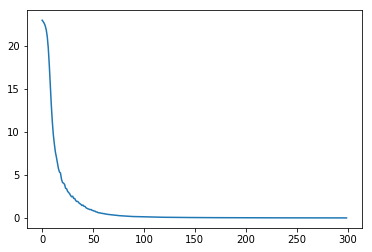

In [10]:
validate_homework()
#score_homework()

start time 1496142108.1020088
epoch 0 time 0.7207388877868652 cost 413.101
epoch 1 time 1.479499101638794 cost 144.251
epoch 2 time 2.165708541870117 cost 104.12
epoch 3 time 2.8440725803375244 cost 82.4562
epoch 4 time 3.5276787281036377 cost 67.9612
epoch 5 time 4.20912504196167 cost 56.6846
epoch 6 time 5.003258228302002 cost 49.0914
epoch 7 time 5.805946588516235 cost 43.1323
epoch 8 time 6.536020040512085 cost 38.1202
epoch 9 time 7.240007638931274 cost 33.7654
epoch 10 time 7.928476810455322 cost 29.7394
epoch 11 time 8.618265390396118 cost 26.5829
epoch 12 time 9.308708190917969 cost 23.7253
epoch 13 time 9.996573209762573 cost 21.6041
epoch 14 time 10.688621520996094 cost 19.4012
epoch 15 time 11.409627676010132 cost 17.1219
epoch 16 time 12.118242979049683 cost 15.2361
epoch 17 time 12.819770097732544 cost 13.8781
epoch 18 time 13.505347728729248 cost 12.1757
epoch 19 time 14.218791007995605 cost 10.5838
epoch 20 time 14.903971672058105 cost 9.76465
epoch 21 time 15.5850925445

epoch 176 time 120.78199458122253 cost 0.0873951
epoch 177 time 121.46211194992065 cost 0.0865744
epoch 178 time 122.13696479797363 cost 0.0860436
epoch 179 time 122.81354665756226 cost 0.085417
epoch 180 time 123.49779343605042 cost 0.0845466
epoch 181 time 124.17520928382874 cost 0.0839036
epoch 182 time 124.85418224334717 cost 0.0833841
epoch 183 time 125.53646111488342 cost 0.0826825
epoch 184 time 126.21570229530334 cost 0.0821642
epoch 185 time 126.89334416389465 cost 0.0813151
epoch 186 time 127.57325458526611 cost 0.0808353
epoch 187 time 128.24826169013977 cost 0.0803085
epoch 188 time 128.92513751983643 cost 0.0796371
epoch 189 time 129.60371685028076 cost 0.079176
epoch 190 time 130.27658987045288 cost 0.0785262
epoch 191 time 130.95496439933777 cost 0.07804
epoch 192 time 131.62975430488586 cost 0.0774454
epoch 193 time 132.30295276641846 cost 0.0767866
epoch 194 time 132.97950506210327 cost 0.0761455
epoch 195 time 133.65897965431213 cost 0.0758514
epoch 196 time 134.33875

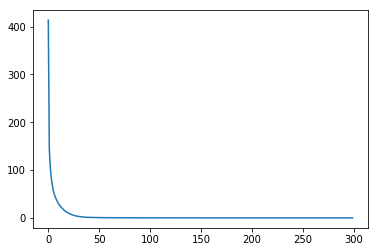

In [11]:
score_homework()